<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

##Grupo 6 - 2020 (cohorte 2)
*  Carlos Barcia
*  Damian Campana
*  Joel de Andres
*  Ará Berberian
*  Marcelo Tisera
*  Daniel Gonzalez

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
#import io
import warnings; warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [ ]:
#cargo el dataframe desde el origen por url
df_all = pandas.read_csv('https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
#visualizo las 3 primeras filas
df_all.head(3)

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,...,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,5.3,9.1,10,10,10,10,10,10,10,-,-,7.5,8.8,9.3,10,10,10,10,-,-,10,9.6,8,9.2,10,10,-,-,10,-,...,5.1,9.3,9.7,9.6,10,9.6,9.6,9.3,8.1,9,6,9.4,7.7,10,6.3,5.4,8.3,6.7,8.3,10,9.1,10,9.7,5.6,5.4,6.4,8,6.3,10,6.9,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155,4,-,-,-,3.8,9.5,10,9.5,5,9.9,9.9,8.9,10,-,-,0,5,7.8,10,5,2.5,5.8,-,-,5,6.9,3,4.9,5,5,-,-,5,-,...,4.7,7,8.5,8.9,5,7.3,8.5,6.2,5.9,6.9,4.8,0.5,2.6,0,3.7,0,1.1,1.6,2.8,0,5.3,10,5.1,5.6,4.1,6,6,7.8,3,5.4,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159
2,2017,AGO,Angola,Sub-Saharan Africa,5.4,151,4,-,-,-,3.4,8.1,10,9.7,7.5,9.9,7.2,8.9,10,-,-,5,7.5,8.1,5,5,10,6.7,-,-,10,8.9,7.5,8.8,2.5,2.5,-,-,2.5,-,...,3,9.4,4.2,3.7,5,5.6,9.2,7.7,4.3,7.1,4.9,2.5,3.7,0,2.9,3.1,0.1,2,3.2,5,9.2,6,6.7,10,4.4,7.2,4,6.6,0,5.4,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158


In [ ]:
df_all.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [ ]:
score_cols = [col for col in df_all.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols


In [ ]:
#selecciono solo las columnas del set de datos con que se va a trabajar
df_all = df_all[important_cols]

Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [ ]:
df_all.dtypes

year                       int64
ISO_code                  object
countries                 object
region                    object
pf_identity_legal         object
pf_identity_sex_male      object
pf_identity_sex_female    object
pf_identity_sex           object
pf_identity_divorce       object
pf_identity               object
pf_score                  object
pf_rank                   object
ef_score                  object
ef_rank                   object
hf_score                  object
hf_rank                   object
dtype: object

**REMPLAZO DE VALORES '-' POR VALOR NULL (nan)**<br>
Utilizo el df_all que ya tiene filtrada las columnas importanes.
NO necesito indicarle al DF cuales son las columnas a remplazar - por nan


In [ ]:
'''
Remplazo de guiones de columnas string por numpy.nan
Se convierten las columnas del dataframe a pandas.to_numeric()
'''

df_all = df_all.replace('-', numpy.nan)
for score_col in score_cols:
    df_all[score_col] = pandas.to_numeric(df_all[score_col])

#visualizar los últimos 2 registros
df_all.tail(2)



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0
1619,2008,HKG,Hong Kong,East Asia,NaN,10.0,10.0,10.0,10.0,10.0,9.13,12.0,9.11,1.0,9.12,1.0


In [ ]:
#se verifica los tipos de datos de las columnas
df_all.dtypes

year                        int64
ISO_code                   object
countries                  object
region                     object
pf_identity_legal         float64
pf_identity_sex_male      float64
pf_identity_sex_female    float64
pf_identity_sex           float64
pf_identity_divorce       float64
pf_identity               float64
pf_score                  float64
pf_rank                   float64
ef_score                  float64
ef_rank                   float64
hf_score                  float64
hf_rank                   float64
dtype: object

# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  3. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  3. ¿Tiene sentido calcular la moda?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

---
**Creo distintos DataFrame para separar sudamerica y argentina.**
* df_all = 100% de datos
* df_latin = dataset filtrado por region
* df_argentina = dataset de df_latin filtrado por pais = argentina


In [ ]:
#regiones unicas en el set de datos
df_all.region.unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

In [ ]:
df_mundo = df_all.copy()

#filtro datafreme de la region de latin america
#df_latin = df_mundo[df_mundo.region == 'Latin America & the Caribbean']
#df_latin.head(3)   



In [ ]:
#filtro datafreme de la region de latin america
df_latin = df_mundo[df_mundo.region == 'Latin America & the Caribbean']
df_latin.head(3)   

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
8,2017,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.87,48.0,7.25,58.0,7.56,48.0
11,2017,BRD,Barbados,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,7.59,57.0,6.45,112.0,7.02,66.0


In [ ]:
#quito del set de datos latinoamerica
df_all = df_all[df_all.region != 'Latin America & the Caribbean']
df_all.head(2)

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0


In [ ]:
#Filtro dataframe de latin america para pais = argentina
df_argentina = df_latin[df_latin.countries == 'Argentina']
df_argentina.head(2)

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
165,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.10,45.0,5.40,151.0,6.75,85.0


<br>
<H3>Respuestas</H3> 
<b>PARTE 1</b> - ( Estadísticos descriptivos)<br>
1.1 Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [ ]:
#Rango de todas las columnas  
print("Tabla descriptiva de los rangos de las variables numéricas\n")
df_mundo[['pf_identity','pf_score', 'ef_score', 'hf_score']].describe()


Tabla descriptiva de los rangos de las variables numéricas



,pf_identity,pf_score,ef_score,hf_score
count,1540.000000,1540.000000,1540.000000,1540.000000
mean,7.280649,7.163409,6.792981,6.978214
std,3.181577,1.392409,0.906827,1.056239
min,0.000000,2.220000,2.580000,3.690000
25%,5.000000,6.147500,6.220000,6.280000
50%,8.800000,7.145000,6.880000,6.900000
75%,10.000000,8.380000,7.440000,7.880000
max,10.000000,9.560000,9.110000,9.120000


In [ ]:
print(f"Set de datos completo")
print(f"Rango de las variables númericas a estudiar")
print(f"----------------------------------------------------------------------")

for col in df_mundo.loc[:,['pf_identity','pf_score', 'ef_score', 'hf_score']]:
    #print('Variable ', col)    
    #print('Variable ', col, '  Rango = ', str(dataset[col].max() - dataset[col].min()))
        print(  f"{col.ljust(15)}:  Min:{str(df_mundo[col].min()).ljust(5)} - Max: {str(df_mundo[col].max()).ljust(5)}  - Rango: {str(round(df_mundo[col].max() - df_mundo[col].min(),2))}  - Media: {round(df_mundo[col].mean(), 2)} - Mediana: {df_mundo[col].median()}" )
print(f"----------------------------------------------------------------------")

Set de datos completo
Rango de las variables númericas a estudiar
----------------------------------------------------------------------
pf_identity    :  Min:0.0   - Max: 10.0   - Rango: 10.0  - Media: 7.28 - Mediana: 8.8
pf_score       :  Min:2.22  - Max: 9.56   - Rango: 7.34  - Media: 7.16 - Mediana: 7.145
ef_score       :  Min:2.58  - Max: 9.11   - Rango: 6.53  - Media: 6.79 - Mediana: 6.88
hf_score       :  Min:3.69  - Max: 9.12   - Rango: 5.43  - Media: 6.98 - Mediana: 6.9
----------------------------------------------------------------------


In [ ]:
print(f"Set de datos para Latinoamerica & Caribe")
print(f"Rango de las variables númericas a estudiar")
print(f"----------------------------------------------------------------------")

for col in df_latin.loc[:,['pf_identity','pf_score', 'ef_score', 'hf_score']]:
    #print('Variable ', col)    
    #print('Variable ', col, '  Rango = ', str(dataset[col].max() - dataset[col].min()))
    print(  f"{col.ljust(15)}:  Min:{str(df_latin[col].min()).ljust(5)} - Max: {str(df_latin[col].max()).ljust(5)} - Rango: {str(round(df_latin[col].max() - df_latin[col].min(),2))}  - Media: {round(df_latin[col].mean(), 2)} - Mediana: {df_latin[col].median()}" )
print(f"----------------------------------------------------------------------")

Set de datos para Latinoamerica & Caribe
Rango de las variables númericas a estudiar
----------------------------------------------------------------------
pf_identity    :  Min:4.2   - Max: 10.0  - Rango: 5.8  - Media: 8.58 - Mediana: 10.0
pf_score       :  Min:5.03  - Max: 8.82  - Rango: 3.79  - Media: 7.35 - Mediana: 7.29
ef_score       :  Min:2.58  - Max: 7.93  - Rango: 5.35  - Media: 6.73 - Mediana: 6.905
hf_score       :  Min:3.8   - Max: 8.18  - Rango: 4.38  - Media: 7.04 - Mediana: 7.02
----------------------------------------------------------------------


<br>
1.2 Para cada país, tenemos varias realizaciones para cada variable pf_identity y hf_score. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 


*La forma de comparar o analizar las variables entre paises sería utlizando la media empleando todos los registros disponibles, permitiendo ver la tendencia de estas variales a través de los años.*

*No se realizaría la comparación para un solo año, ya que podría faltar un valor en la variable invalidando todo el análisis*

*En el caso de una comparacióón entre una region contra el resto del mundo el uso de la media es mejor debido a que en Latinoamerica existen muchos registros con valor 10.0, pero que la misma no es representativa de la realidad de la region.
También los valores extremos no se encuentran sesgados para tener en cuenta la mediana como valor de medición.*



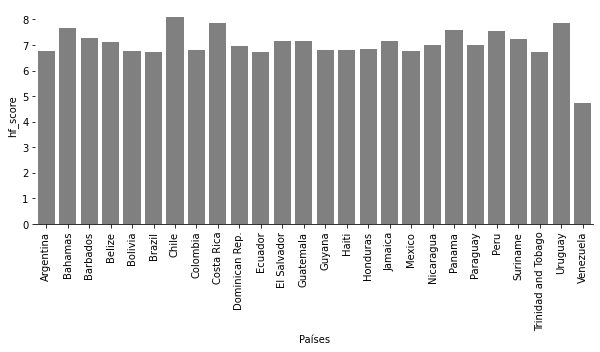

In [ ]:
plt.figure(figsize=(10,4))
seaborn.barplot(data=df_latin ,x='countries',y='hf_score', color='gray', 
                ci=None, 
                estimator = numpy.mean)
plt.xlabel("Países")
plt.xticks(rotation=90)
seaborn.despine(left=True)

*A nivel visual, se compararían el valor de las variables de los países con un grafico de barras, salvo que se requiera ver la evolución a lo largo del tiempo, en todo caso se utilizaría un gráfico de lineas.*

<br>
1.3 Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.

In [ ]:
#Armado de datos de las variables PF_IDENTITY y HF_SCORE en formato Table_Long
#y graficarlas de forma conjunta

_all_pf_identity_max = df_all.pf_identity.max()
_all_pf_identity_min = df_all.pf_identity.min()
_all_pf_identity_mean = df_all.pf_identity.mean()
_all_pf_identity_median = df_all.pf_identity.median()
_all_pf_identity_std = df_all.pf_identity.std()

_all_pf_score_max = df_all.pf_score.max()
_all_pf_score_min = df_all.pf_score.min()
_all_pf_score_mean = df_all.pf_score.mean()
_all_pf_score_median = df_all.pf_score.median()
_all_pf_score_std = df_all.pf_score.std()


_latin_pf_identity_max = df_latin.pf_identity.max()
_latin_pf_identity_min = df_latin.pf_identity.min()
_latin_pf_identity_mean = df_latin.pf_identity.mean()
_latin_pf_identity_median = df_latin.pf_identity.median()
_latin_pf_identity_std = df_latin.pf_identity.std()

_latin_pf_score_max = df_latin.hf_score.max()
_latin_pf_score_min = df_latin.hf_score.min()
_latin_pf_score_mean = df_latin.hf_score.mean()
_latin_pf_score_median = df_latin.hf_score.median()
_latin_pf_score_std = df_latin.hf_score.std()

#armo diccionario con los datos

_data = []
_data.append( {
    'zona':'mundo',
    'media': _all_pf_identity_mean,
    'mediana': _all_pf_identity_median,
    'std': _all_pf_identity_std,
    'variable': 'pf_identity'

}  )
_data.append( {
    'zona':'mundo',
    'media': _all_pf_score_mean,
    'mediana': _all_pf_score_median,
    'std': _all_pf_score_std,
    'variable': 'hf_score'

}  )


_data.append( {
    'zona':'latin',
    'media': _latin_pf_identity_mean,
    'mediana': _latin_pf_identity_median,
    'std': _latin_pf_identity_std,
    'variable': 'pf_identity'

}  )
_data.append( {
    'zona':'latin',
    'media': _latin_pf_score_mean,
    'mediana': _latin_pf_score_median,
    'std': _latin_pf_score_std,
    'variable': 'hf_score'

}  )


In [ ]:
#Creo dataframe con los valores del diccionario
print("MEDIA y MEDIANA de los datos para el mundo y latinoamerica\r\n")

df_mundo_latin = pandas.DataFrame.from_dict(_data)
df_mundo_latin


MEDIA y MEDIANA de los datos para el mundo y latinoamerica



,zona,media,mediana,std,variable
0,mundo,7.018721,8.80,3.323457,pf_identity
1,mundo,7.126193,6.99,1.496801,hf_score
2,latin,8.582171,10.00,1.875832,pf_identity
3,latin,7.036977,7.02,0.634897,hf_score


Gráfico de la media y mediana agrupadas por región/tipo_variable



[]

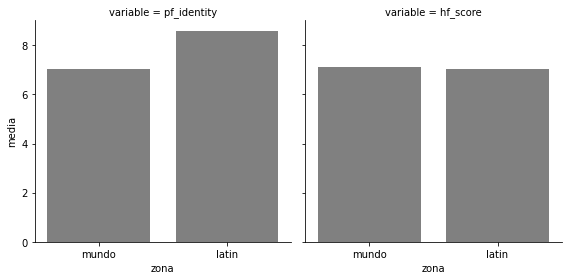

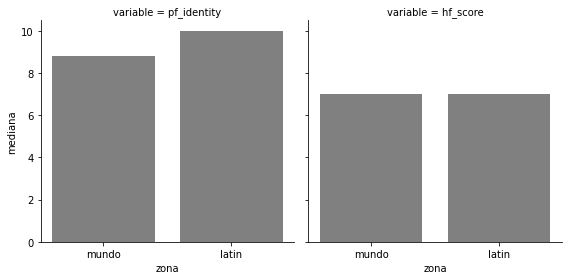

In [ ]:
# Grafico de la media y mediana agrupadas por region/tipo_variable
print("Gráfico de la media y mediana agrupadas por región/tipo_variable\r\n")

g = seaborn.FacetGrid(df_mundo_latin, col="variable", height=4, aspect=1 )
g.map(seaborn.barplot, "zona", "media", color='gray')
g1 = seaborn.FacetGrid(df_mundo_latin, col="variable", height=4, aspect=1)
g1.map(seaborn.barplot, "zona", "mediana", color='gray')

plt.plot()

[]

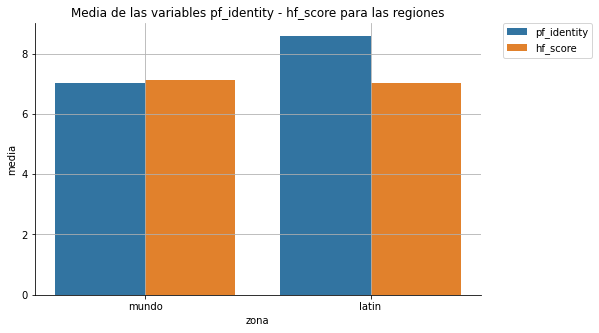

In [ ]:
#Se grafican las dos variables en el mismo gráfico
plt.figure(figsize=(8,5))
seaborn.barplot(data=df_mundo_latin, x=df_mundo_latin.zona,y=df_mundo_latin.media ,hue=df_mundo_latin.variable)
seaborn.despine()
plt.grid()

#leyenda de las lineas fuera del grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Media de las variables pf_identity - hf_score para las regiones")
plt.plot()

<br>
1.4. ¿Tiene sentido calcular la moda?


*No tiene sentido calcular MODA, porque el set de datos no mide la cantidad de ocurrencias de una variable categórica o las variables a analizar son de tipo continuas y puede que no haya repetición de las mismas.*

Solamente haríamos uso de la moda cuando generemos columnas de tipo categóricas

<br>
1.5. ¿Cómo pueden sanearse los valores faltantes?




*Se pueden calcular con un promedio de años anteriores si el país cuenta con antecedentes de valores registrados. En caso de que no haya información de datos anteriores del país para la variable analizada, se puede completar con el promedio de la región* 

<br>
1.6. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?

[]

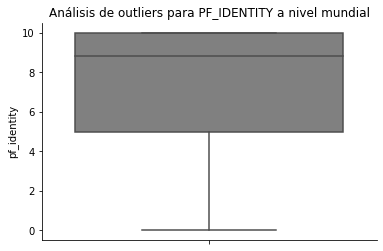

In [ ]:
seaborn.boxplot(data= df_all, y=df_all['pf_identity'] , color='gray')

plt.title("Análisis de outliers para PF_IDENTITY a nivel mundial")
seaborn.despine()
plt.plot()

*Para verificar si existen valores outliers utilizamos el gráfico boxplot el cual nos permitira ver si existen valores por debajo del cuartil 25% y por encima del cuartil 75%*

*Para la variable pf_identity en todo el set de datos y todos los años, no se observan valores outlires*

[]

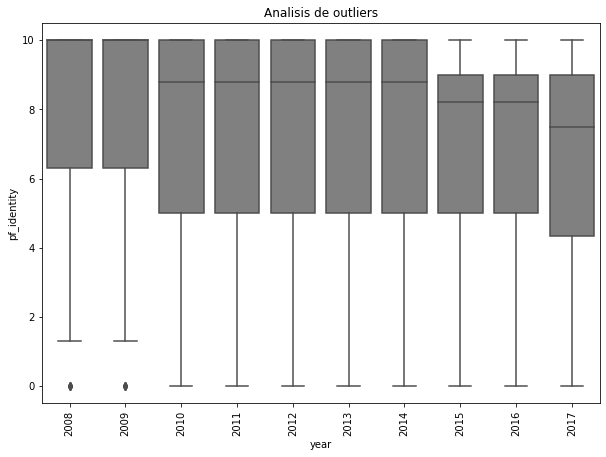

In [ ]:
# Análisis de outliers agrupados por año

plt.figure(figsize=(10,7))
seaborn.boxplot(data=df_mundo, x=df_mundo.year, y=df_mundo.pf_identity, color='gray' )
plt.title('Analisis de outliers')
plt.xticks(rotation=90)
plt.plot()

*Cuando se lo divide por año aparecen valores outliers para el año 2008 y 2009 para PF_IDENTITY*

[]

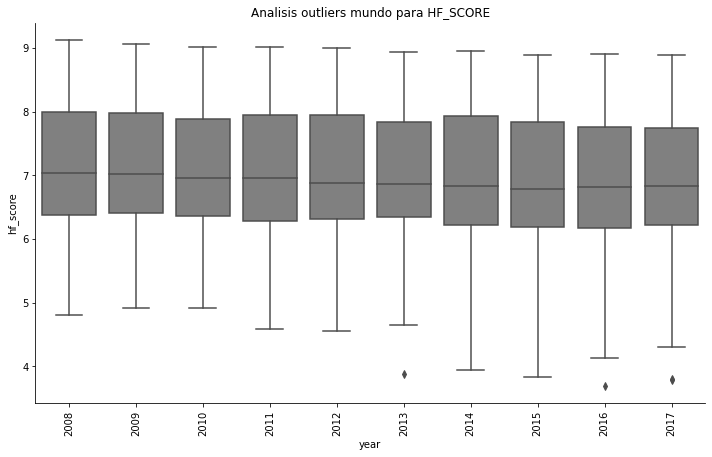

In [ ]:
# Buscamos los países que representan estos outliers para la variable HF_SCORE



plt.figure(figsize=(12,7))
seaborn.boxplot(data=df_mundo, x=df_mundo.year, y=df_mundo.hf_score, color='gray' )
plt.title('Analisis outliers mundo para HF_SCORE')
plt.xticks(rotation=90)
seaborn.despine()
plt.plot()

In [ ]:
#busco los paises que se muestra como outliers
buscar_dato = df_mundo[ df_mundo['hf_score'] <= 4 ][['year','countries','hf_score']]
buscar_dato

,year,countries,hf_score
141,2017,Syria,3.79
157,2017,Venezuela,3.80
303,2016,Syria,3.69
465,2015,Syria,3.83
627,2014,Syria,3.94
789,2013,Syria,3.88


*Se detectaron outliers a nivel global y regional para la variable HF_SCORE. Se verificó estos valores y corresponde para los paises de venezuela y syria.
Estos datos consideramos no eliminarlos ya que son indicadores válidos y corresponden para realizar analisis regionales*


<br>
<br>
<H2> 2. Agregación de datos <h2>

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

<br>
<H3>Respuestas</H3> 
<b>PARTE 1</b> - ( Agregación de datos )<br>
2.1 Grafiquen la media de la variable pf_identity y hf_score a través de los años..

[]

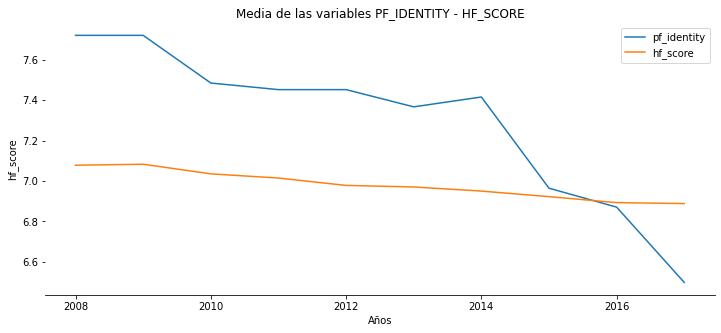

In [ ]:
#Grafico de lineas de dos variables con años en eje X y valor media de la 
#varialbe en eje Y

plt.figure(figsize=(12,5))

seaborn.lineplot(data=df_mundo, x=df_mundo.year,y=df_mundo.pf_identity, 
                 ci=None, estimator=numpy.mean, label='pf_identity')
seaborn.lineplot(data=df_mundo, x=df_mundo.year,y=df_mundo.hf_score, 
                 ci=None, estimator=numpy.mean,label='hf_score')

plt.title("Media de las variables PF_IDENTITY - HF_SCORE")
plt.legend()
plt.xlabel('Años')
seaborn.despine(left=True)
plt.plot()

2.2 Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

[]

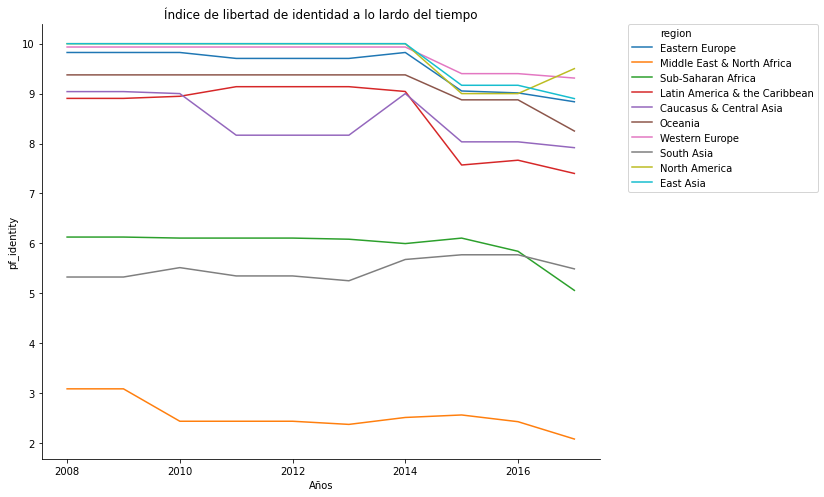

In [ ]:
# Grafico de la media de la variable PF_IDENTITY para todas las regiones del dataset 

plt.figure(figsize=(10,8))
seaborn.lineplot(data=df_mundo, x=df_mundo.year,y=df_mundo.pf_identity, 
                 ci=None, estimator=numpy.mean, hue=df_mundo.region)

#leyenda de las lineas fuera del grafico
plt.title('Índice de libertad de identidad a lo lardo del tiempo')
plt.xlabel('Años')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()
plt.plot()

[]

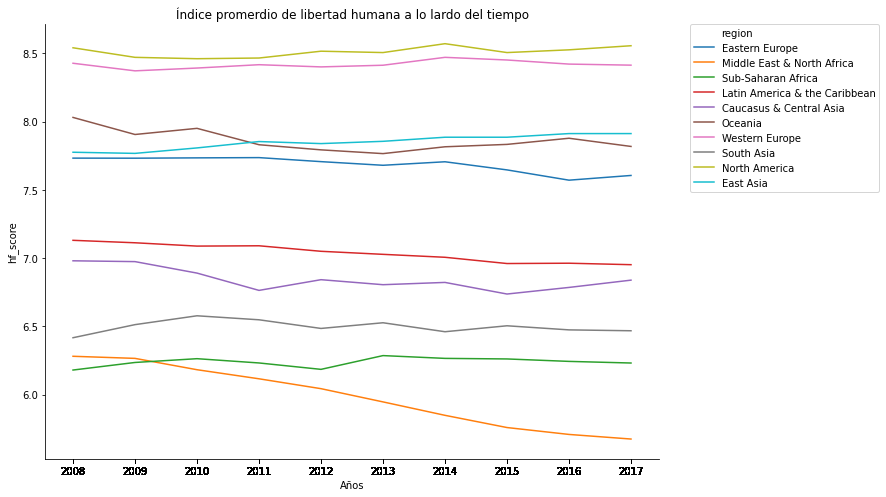

In [ ]:
# Grafico de la media de la variable HF_SCORE para todas las regiones del dataset 

plt.figure(figsize=(11,8))
seaborn.lineplot(data=df_mundo, x=df_mundo.year,y=df_mundo.hf_score, 
                 ci=None, estimator=numpy.mean, hue=df_mundo.region)

plt.title('Índice promerdio de libertad humana a lo lardo del tiempo')
plt.xlabel('Años')

#leyenda de las lineas fuera del grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(df_all.year)
seaborn.despine()
plt.plot()

*Si se consideran los valores medios del Índice de Libertad de Identidad (pf_identity) separados por región, se observa que la tendencia es en general decreciente al igual que para el índice global.*
 <br>
*Se observa una primer caída en el año 2010 marcada principalmente por los valores observados en Middle East & North Africa, luego una leve recuperación y tendencia decreciente hasta el año 2017.*
<br>

*El índice promedio de libertad humana (hf_score) global presenta una tendencia decreciente más suave que el índice de libertad de identidad. Esta situación también se ve reflejada separando por regiones, donde todas las regiones presentan tendencia decreciente en los últimos años.*


<br>
2.3 Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

In [ ]:
# Filtro paises de la region para graficar
df_paises_lat = df_latin[ df_latin.countries.isin( ['Argentina','Brazil','Chile'] )]

*Seleccionamos los paises de la region por importancia en la economía regional. Pero también se pueden seleccionar basado en el ranking promedio de cada pais para la variable hf_rank o tomar los paises con mayor promedio de libertad económica*

[]

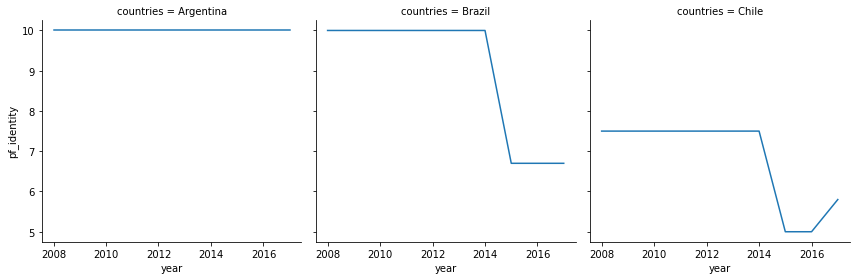

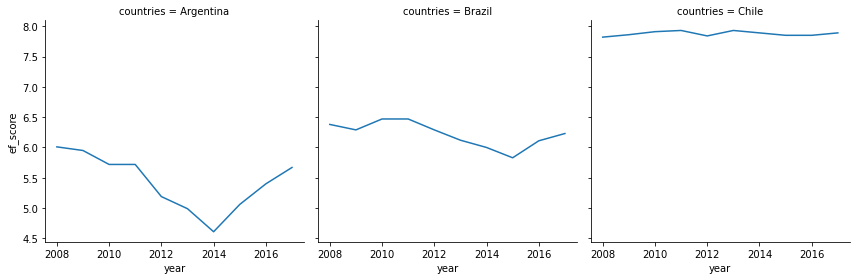

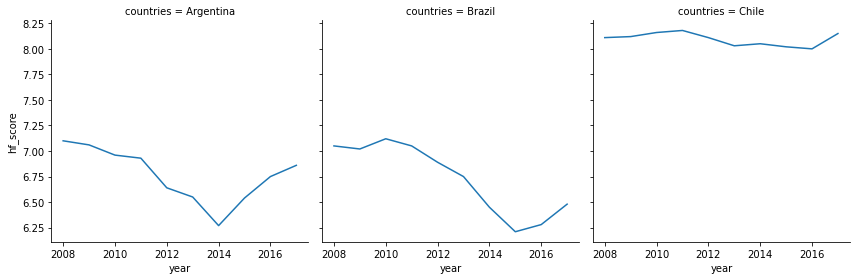

In [ ]:
# Generamos un gráfico que muestre para cada variable y paíces

g = seaborn.FacetGrid(df_paises_lat, col="countries", height=4, aspect=1)
g.map(seaborn.lineplot, "year", "pf_identity")
g2 = seaborn.FacetGrid(df_paises_lat, col="countries", height=4, aspect=1)
g2.map(seaborn.lineplot, "year", "ef_score")
g1 = seaborn.FacetGrid(df_paises_lat, col="countries", height=4, aspect=1)
g1.map(seaborn.lineplot, "year", "hf_score")

plt.plot()

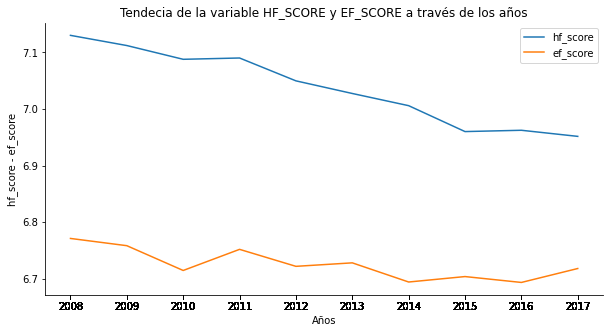

In [ ]:
# Grafico de la tendencia de las variables HF_SCORE y EF_SCORE

plt.figure(figsize=(10,5))

seaborn.lineplot(data=df_latin, x=df_latin.year, y=df_latin.hf_score, ci=None, label="hf_score")
seaborn.lineplot(data=df_latin, x=df_latin.year, y=df_latin.ef_score, ci=None, label="ef_score")

plt.title("Tendecia de la variable HF_SCORE y EF_SCORE a través de los años")
plt.ylabel("hf_score - ef_score")
plt.xlabel("Años")
plt.xticks(df_latin.year)
plt.legend()


seaborn.despine()


*Se puede visualizar una tendencia decreciente en la libertad personal en la región a partir del 2015 (pd_idenity) la cual influye en el puntaje de PH_SCORE y por ende este afecha al HF_SCORE final.
Se puede deber a distintos factores (Cambios de gobierno, Devaluación, etc).*

*El decremento de la variable pf_identity no afecta en gran medida al puntaje final de la libertad económica. Por lo que se ve que hay un leve tendencia a disminuir por no tan marcada como las libertades personales*

<br>
<h3> 3. Distribuciones </h3>
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


<br>
<H3>Respuestas</H3> 
<b>PARTE 1</b> - ( Distribuciones )<br>
3.1 Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?

[]

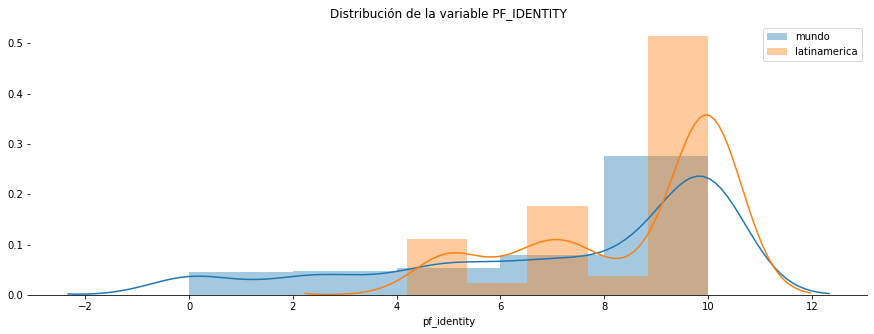

In [ ]:
# Grafico de histograma/Distribucion de las variables pf_identity
plt.figure(figsize=(15,5))
#seaborn.distplot(df_mundo.query('year==2014').pf_identity, label='mundo', bins=5)
#seaborn.distplot(df_latin.query('year==2014').pf_identity, label='latinamerica', bins=5)
seaborn.distplot(df_mundo.pf_identity, label='mundo', bins=5)
seaborn.distplot(df_latin.pf_identity, label='latinamerica', bins=5)

plt.title("Distribución de la variable PF_IDENTITY")
plt.legend()
seaborn.despine(left=True)
plt.plot()

[]

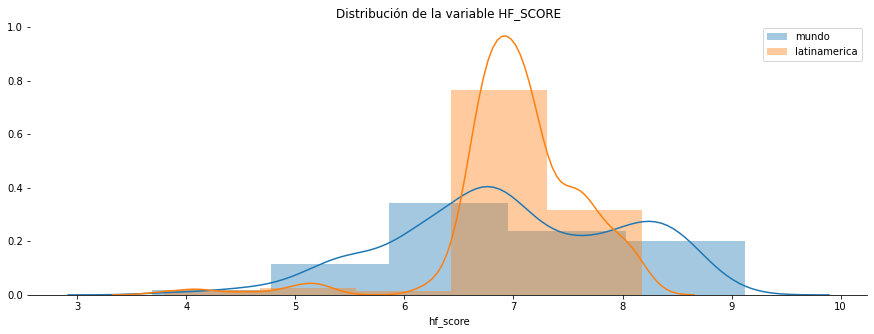

In [ ]:
plt.figure(figsize=(15,5))
#seaborn.distplot(df_mundo.query('year==2015').hf_score, label='mundo', bins=5)
#seaborn.distplot(df_latin.query('year==2015').hf_score, label='latinamerica', bins=5)
seaborn.distplot(df_mundo.hf_score, label='mundo', bins=5)
seaborn.distplot(df_latin.hf_score, label='latinamerica', bins=5)

plt.title("Distribución de la variable HF_SCORE")
plt.legend()
seaborn.despine(left=True)
plt.plot()

*En cuanto a la distribución, para la variable **pf_identity** la densidad esta concentrada en los valores máximos (de 8 a 10). Visualmente la variable tiene una distribucion normal asimetrica a la izquierda.*

*Para la variable **hf_score** se asemeja a una distribucion normal en latinoamerica y para el mundo una distribucion binomial (con dos picos entre 6.7 y 8.3).*


*Estas visualizaciones se obtiene analizando todos los valores de las variables a través de los años.
Se podría realizar una analisis individual por años, donde se observa una libertad de identidad en valores máximos hasta el año 2014. Posterior a este año se ve que la función de distribución pasa a tener dos picos (binomial) lo que indica que hubo una pérdida en las libertades de identidad en las regiones.*
     

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



<br>
<H3>Respuestas</H3> 
<b>PARTE 1</b> - ( Correlaciones y Relaciones )<br>
4.1 ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

[]

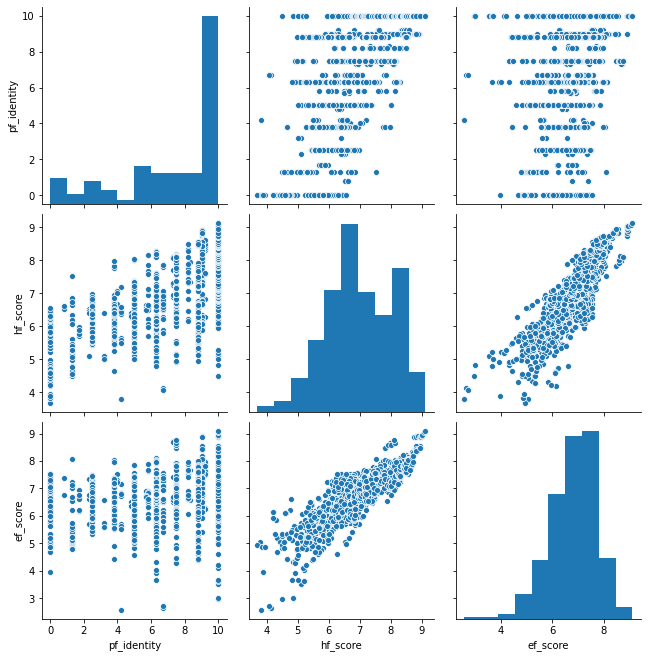

In [ ]:
#pair plot
seaborn.pairplot(
    data=df_mundo,
    vars=['pf_identity','hf_score', 'ef_score'],
     height=3)
#plt.title("Comparación de variables")
plt.plot()

*Este gráfico nos permite ver de una sola observación la distribución de las variables y como se relacionan entre ellas.*

*El grafico de pairplot no deberia contener una comparacióón entre variables discretas(pf_identity) y variables continuar (pf_socre, ef_score) ya que no permite ver si existe una correlación directa entre éstas.*


<br>

4.2 Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.


[]

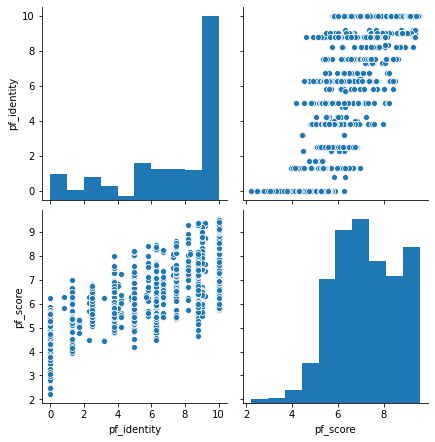

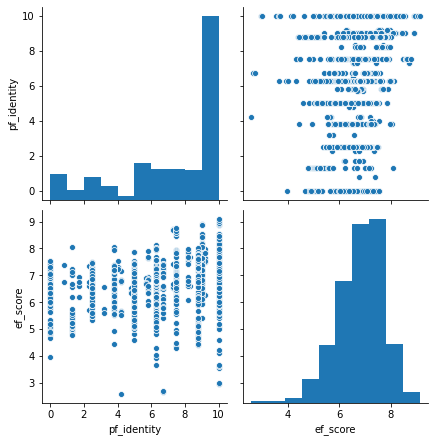

In [ ]:
#pair plot
seaborn.pairplot(
    data=df_mundo,
    vars=['pf_identity','pf_score'],
     height=3)

seaborn.pairplot(
    data=df_mundo,
    vars=['pf_identity', 'ef_score'],
     height=3)
#plt.title("Comparación de variables")
plt.plot()

*Respecto a la relación entre pf_identity y pf_score, podemos observar que a medida que pf identity es mayor, pf_score tambien lo es, debido a que pf_identite es un subindece que compone a pf_score.*

*Analizando la relación entre pf_identity y ef_score no se ve una relación directa. Si bien en algunos países el incremento de las libertades personales incluyen también un incremento de las libertades economicas, no es necesariamente asi en el resto de paises.*

<br>
4.3 Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.

In [ ]:
#funcion para cortar en segmentos en partes iguales de .33
segmentos = ['low', 'medium', 'high']


#considero que 10 es el valor máximo (podria ser el valor maximo de toda la serie 9.56)

q_33 = (.33*10)
q_66 = (.66*10)
q1 = 1




def get_label_segmento(valor):
    if valor > 0 and valor <= q_33:
        return segmentos[0]
    elif valor > q_33 and valor <= q_66:
        return segmentos[1]
    else:
        return segmentos[2]


def get_label_segmento_quartiles(valor, q33, q66):

    if valor > 0 and valor <= q33:
        return segmentos[0]
    elif valor > q33 and valor <= q66:
        return segmentos[1]
    else:
        return segmentos[2]



In [ ]:
#valido la fución
#print(get_label_segmento_quartiles(7.1, df_latin.ef_score.quantile(.10), df_latin.ef_score.quantile(.60)  ))
#pandas.cut(df_latin.pf_identity,  bins=3, labels=['low', 'medium', 'high'])

In [ ]:
df_latin["pf_identity_segment"] = pandas.cut(df_latin.pf_identity,  bins=3, labels=['low', 'medium', 'high'])
df_latin["pf_score_segment"] = pandas.cut(df_latin.pf_score,  bins=3, labels=['low', 'medium', 'high'])
df_latin["ef_score_segment"] = pandas.cut(df_latin.ef_score,  bins=3, labels=['low', 'medium', 'high'])


df_all["pf_identity_segment"] = pandas.cut(df_all.pf_identity,  bins=3, labels=['low', 'medium', 'high'])
df_all["pf_score_segment"] = pandas.cut(df_all.pf_score,  bins=3, labels=['low', 'medium', 'high'])
df_all["ef_score_segment"] = pandas.cut(df_all.ef_score,  bins=3, labels=['low', 'medium', 'high'])


df_mundo["pf_identity_segment"] = pandas.cut(df_all.pf_identity,  bins=3, labels=['low', 'medium', 'high'])
df_mundo["pf_score_segment"] = pandas.cut(df_all.pf_score,  bins=3, labels=['low', 'medium', 'high'])
df_mundo["ef_score_segment"] = pandas.cut(df_all.ef_score,  bins=3, labels=['low', 'medium', 'high'])


df_latin["pf_identity_segment_usr"] = df_latin.pf_identity.apply(lambda x: get_label_segmento(x))
df_latin["pf_score_segment_usr"] = df_latin.pf_score.apply(lambda x: get_label_segmento(x)) 
df_latin["ef_score_segment_usr"] = df_latin.ef_score.apply(lambda x: get_label_segmento(x))


df_latin["pf_identity_segment_usr_1"] = df_latin.pf_identity.apply(lambda x: get_label_segmento_quartiles(x, df_latin.pf_identity.quantile(.33), df_latin.pf_identity.quantile(.66)))
df_latin["pf_score_segment_usr_1"] = df_latin.pf_score.apply(lambda x: get_label_segmento_quartiles(x, df_latin.pf_score.quantile(.33), df_latin.pf_score.quantile(.66)) )
df_latin["ef_score_segment_usr_1"] = df_latin.ef_score.apply(lambda x: get_label_segmento_quartiles(x, df_latin.ef_score.quantile(.33), df_latin.ef_score.quantile(.66)))



In [ ]:
df = df_latin[['year','region', 'countries','ef_score', 'ef_score_segment', 'ef_score_segment_usr',  'ef_score_segment_usr_1']]
df.sort_values(by=['year','region','countries'], ascending=True)

*Se analizaron tres (3) formas de segmanter las variables.*
<br>
*Se utilizarón:*
*   *Función de pandas "CUT"*
*   *Función definida por nosotros (segmentado cada 33%)*
*   *Función definida por nosotros (segmentando por cuartiles de .33%)*

*De acuerdo a como están concentrados los datos de la region "Latinoamerica" y la definición de cada intervalor (33%) los resultados obtenidos varían en cada caso.*

*Optamos por utlizar el valor default ue brinda la funcion pandas.cut para que tome los rangos del .25, .5 y .75 para cada intervalor. Ya que los otros métodos eran máás sesgados y no se generaba un intervalo LOW para pf_identity*



<br>
4.4 Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.


[]

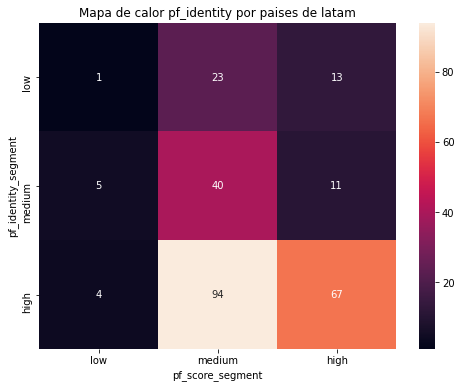

In [ ]:
plt.figure(figsize=(8,6))
exp = pandas.crosstab(df_latin.pf_identity_segment, df_latin.pf_score_segment, dropna=True)

plt.title("Mapa de calor pf_identity por paises de latam")
seaborn.heatmap(exp, annot=True)
plt.plot()

[]

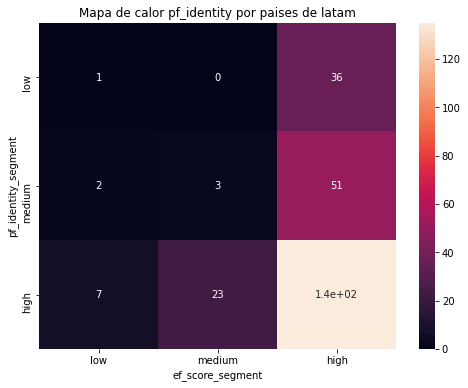

In [ ]:

plt.figure(figsize=(8,6))
exp = pandas.crosstab(df_latin.pf_identity_segment, df_latin.ef_score_segment, dropna=True)

plt.title("Mapa de calor pf_identity por paises de latam")
seaborn.heatmap(exp, annot=True)
plt.plot()

[]

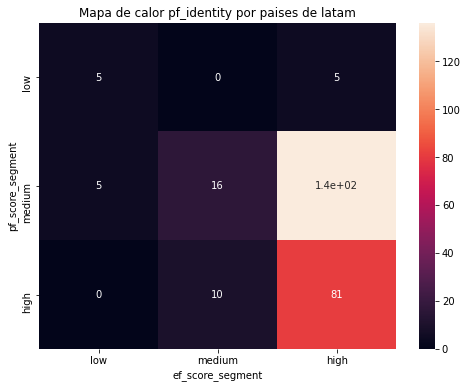

In [ ]:
plt.figure(figsize=(8,6))
exp = pandas.crosstab(df_latin.pf_score_segment, df_latin.ef_score_segment, dropna=True)

plt.title("Mapa de calor pf_identity por paises de latam")
seaborn.heatmap(exp, annot=True)
plt.plot()

*Se puede ver que hay una gran cantidad de ocurrencias cuando la variable pf_identity es high y el pf_score es high/midium.*

*Muestra el grado de distribucion/correlacion de los registros*

<br>
<h2> Parte 2</h2>

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

1. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

<br>
<H3>Respuestas</H3> 
<b>PARTE 2</b> - ( Distribuciones )<br>
3.1 Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior

In [ ]:
from scipy import stats

In [ ]:
def get_lista_norm(data, filter=False, anio=''):

    datos = []
    valores_norm = []

    # media de la lista de valores
    _datos_media = numpy.mean(data)
    
    # Desviacion estandar de la lista de valores 
    _datos_std = numpy.std(data)
    
    if filter:

        datos = data.query(f'year == {anio}').sort_values(ascending=True).dropna()
    
    else:
        
        datos = data.sort_values(ascending=True).dropna()

    valores_norm = (datos - _datos_media)/_datos_std

    return valores_norm

In [ ]:
# lista normalizada para las variables pf_identity, pf_score, ef_score, hf_score 
# para litinoamerica

_lst_latam_pf_identity = get_lista_norm(df_latin.pf_identity)
_lst_latam_pf_score = get_lista_norm(df_latin.pf_score)
_lst_latam_ef_score = get_lista_norm(df_latin.ef_score)
_lst_latam_hf_score = get_lista_norm(df_latin.hf_score)


In [ ]:

#Prueba KS para pf_identity, pf_score, ef_score, hf_score  en Latinoamérica
_D_pf_identity,_pv_pf_identity =  stats.kstest(_lst_latam_pf_identity, 'norm')
_D_pf_score,_pv_pf_score = stats.kstest(_lst_latam_pf_score, 'norm')
_D_ef_score,_pv_ef_score = stats.kstest(_lst_latam_ef_score, 'norm')
_D_hf_score,_pv_hf_score = stats.kstest(_lst_latam_hf_score, 'norm')


In [ ]:
print(_D_pf_identity,_pv_pf_identity)
print(_D_pf_score,_pv_pf_score)
print(_D_ef_score,_pv_ef_score)
print(_D_hf_score,_pv_hf_score)

0.3492111070640963 1.2587290006804688e-28
0.054195468433480776 0.4239026359094282
0.1364664241180949 0.00011861345386545781
0.1677029942735285 8.223362220413919e-07


In [ ]:
#armo diccionario con los datos

_d_test = []
_d_test.append( {
    'KS_D':'_D_pf_identity',
    '_D_': _D_pf_identity,
    'p-v':'_pv_pf_identity',
    'P-valor': _pv_pf_identity
}  )

_d_test.append( {
    'KS_D':'_D_pf_score',
    '_D_': _D_pf_score,
    'p-v':'_pv_pf_score',
    'P-valor': _pv_pf_score
}  )


_d_test.append( {
    'KS_D':'_D_ef_score',
    '_D_': _D_ef_score,
    'p-v':'_pv_ef_score',
    'P-valor': _pv_ef_score
}  )

_d_test.append( {
    'KS_D':'_D_hf_score',
    '_D_': _D_hf_score,
    'p-v':'_pv_hf_score',
    'P-valor': _pv_hf_score
}  )



In [ ]:
# Armo la tabla con los valores del K-S Test

df_test_ks = pandas.DataFrame.from_dict(_d_test)
df_test_ks

,KS_D,_D_,p-v,P-valor
0,_D_pf_identity,0.349211,_pv_pf_identity,1.258729e-28
1,_D_pf_score,0.054195,_pv_pf_score,4.239026e-01
2,_D_ef_score,0.136466,_pv_ef_score,1.186135e-04
3,_D_hf_score,0.167703,_pv_hf_score,8.223362e-07


*Con un nivel de significancia de 0.01 podemos rechazar la hipótesis nula de que las variables pf_identity, ef_score y hf_score tienen una distribución normal. En el caso de la variable pf_score el p-valor es de 0.42 el cual es mayor que el nivel de significancia por lo que no se rechaza la hipótesis nula, lo que implica que es probable que pf_score tenga una distribución normal.*



[]

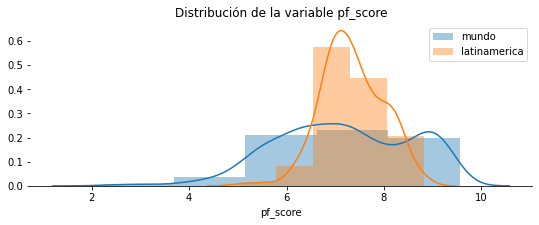

In [ ]:
# Grafico de histograma/Distribucion de las variables pf_identity
plt.figure(figsize=(9,3))
#seaborn.distplot(df_mundo.query('year==2012').pf_identity, label='mundo', bins=5)
#seaborn.distplot(df_latin.query('year==2012').pf_identity, label='latinamerica', bins=5)
seaborn.distplot(df_mundo.pf_score, label='mundo', bins=5)
seaborn.distplot(df_latin.pf_score, label='latinamerica', bins=5)

plt.title("Distribución de la variable pf_score")
plt.legend()
seaborn.despine(left=True)
plt.plot()

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

<br>
<H3>Respuestas</H3> 
<b>PARTE 2</b> - ( Correlaciones )<br>
4.1 Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 

In [ ]:
df_corr = df_latin[['pf_identity', 'pf_score', 'ef_score', 'hf_score']]

corrMatrix = df_corr.corr(method='spearman')
corrMatrix

,pf_identity,pf_score,ef_score,hf_score
pf_identity,1.000000,0.191280,-0.128505,-0.003870
pf_score,0.191280,1.000000,0.211168,0.712783
ef_score,-0.128505,0.211168,1.000000,0.770526
hf_score,-0.003870,0.712783,0.770526,1.000000


*Dado que las variables no son ordinales se descarta utilizar el coeficiente de correlación Kendall. Tampoco es conveniente emplear Pearson ya que en el punto anterior se determinó que es poco probable que pf_identity, ef_score y hf_score tengan una distribución normal, lo cual es uno de sus requisitos. Por esto se decidió que el coeficiente más adecuado para calcular la correlación es Spearman.*

*Se puede ver que las variables PF_SCORE y EF_SCORE tienen una alta correlación con la variable HF_SCORE. En el caso de PF_IDENTITY se encuentra levemente relacionado con PF_SCORE por ser un subíndice que la compone.*

*En el resto de los casos hay un baja correlación o una correlación negativa, la cual no es necesariamente una relación inversa.*





<br>
4.2 [opcional]Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable region es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

<br>
Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?

*Al elegir los diferentes tipos de gráficos tratamos de tener en cuenta el principio de consistencia(las propiedades de la imagen deben corresponderse con las propiedades de los datos )y el principio del ordenamiento por importancia ( la información más importante debe ser codificada con las propiedades de los datos.) Es decir tratar de tener una buena practica de visualización para maximizar la efectividad de la comunicación teniendo en cuenta el tamaño del texto, visibilidad de elementos contra el fondo y métodos de percepción. En otras palabras expresar un patrón racional en cada una de las variables. 
*Por ejemplo en el caso de los gráficos de barras usados para comparar cantidades numéricos entre variables categóricas seria  el caso del punto 1.2 parte uno (  hf_score de los países de latino América)
*Otro ejemplo seria en el caso del grafico de lineas usados en varios puntos como por ejemplo 2.1 parte 2 en el cual graficamos la media de la variable pf_identity y hf_score a través de los años; cada linea representa la variación de dos variables numéricas y a su vez estas múltiples lineas permiten compara las distintas categorías (variables). Esto mismo ocurre con el punto 2.2 parte 2.
En otras palabras evitamos directamente usar gráficos de que no aportan o distorsionan la información o no son fáciles de percibir como el grafico circular en el cual hay que tener una percepción angular o gráficos tridimensionales que complican aun más el análisis.*

<br>

**Respondiendo a las preguntas iniciales del practico:**

**¿Qué niveles de libertad se viven en Latinoamérica, específicamente en cuanto libertades de identidad?**

*Segun lo observado en el  Ejercicio 1.3  (Parte 1) en cuanto a libertades de identidad  Latino América tiene valor superior al promedio del resto mundo ( alrededor de 7 ).  Pero tanto América Latina como el resto del mundo se visualiza en los distintos gráficos un descenso con el transcurso de los años.*

**¿Qué significa tener un puntaje de 4.5?**

*Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
Es  mínimo valor que asume variable (libertades de identidad). El cual expresa una restricción a los diferentes tipos de derechos que poseen las personas en los países ( dado el rango de la variable de 0 a 10). Que no quiere expresar otra cosa que son países sub-desarrollados. Claramente si comparamos con el promedio de latinoamericano estamos en una realidad que se correspondería como países  en vía de desarrollo pero no quiere decir que si se analizan de forma pormenorizado los sub-indices de las variables estén todas en la misma situación*

**¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?**
*Según Ejercicio 2.1 (Parte 1)  la evolución de la variable tiene pendiente negativa en relación al tiempo. Es decir que  estamos empeorando.*


**¿Se relacionan de la misma manera con la libertad de identidad?(hf_score , ef_score, pf_score)**

*En base a los diferentes gráficos producidos e interpretando a las variables podemos establecer que estos estimadores no se relacionan de la misma forma con la libertad de identidad. En el caso con la variable pf_score  existe un alto grado de correlación ya que la liberad de identidad constituye un sub-indice para su elaboración. Mientras que con las variable ef_score no se da de la misa manera ya que existe una gran dispersión de datos. Es decir en algunos países si existe un alto grado de relación mientras que en otros es inversamente proporcional.*